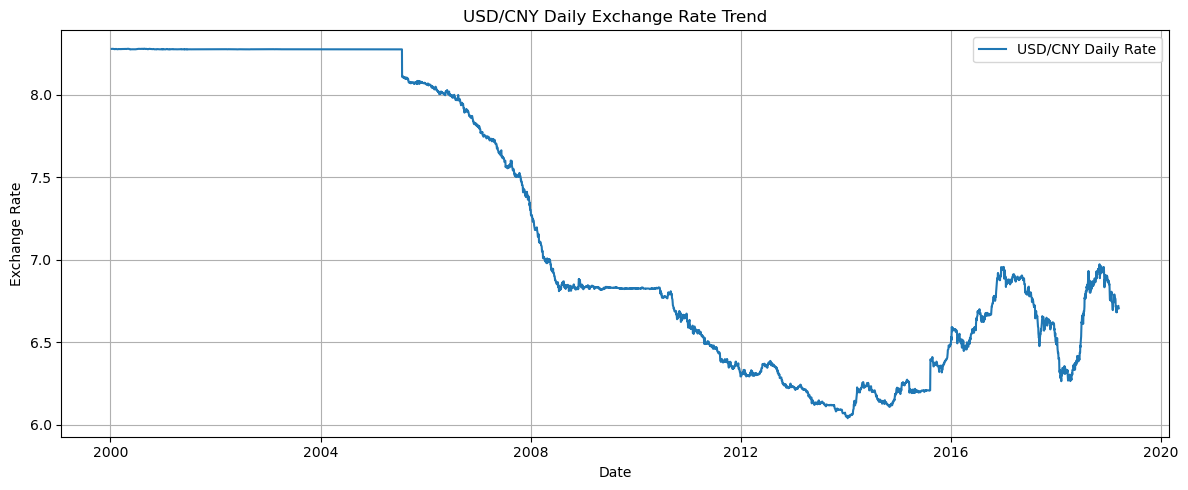

基本统计信息：
count    5000.000000
mean        7.207866
std         0.833912
min         6.040200
25%         6.439950
50%         6.842750
75%         8.276500
max         8.279900
Name: USD_CNY, dtype: float64

前几行月度数据：
Date
2000-01-31    8.2777
2000-02-29    8.2786
2000-03-31    8.2787
2000-04-30    8.2799
2000-05-31    8.2773
Freq: ME, Name: USD_CNY, dtype: float64


C:\Users\zazza\AppData\Local\Temp\ipykernel_9012\1286715775.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['USD_CNY'].resample('M').last()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据（适配 investing.com 的格式）
df = pd.read_csv("USD_CNY Historical Data.csv")

# 2. 日期格式转换 + 汇率转数值 + 按时间升序排序
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['USD_CNY'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.sort_values('Date')
df = df.set_index('Date')

# 3. 可视化日度汇率趋势
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['USD_CNY'], label='USD/CNY Daily Rate')
plt.title("USD/CNY Daily Exchange Rate Trend")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4. 汇率基本统计信息
print("基本统计信息：")
print(df['USD_CNY'].describe())

# 5. 重采样为月度数据（用于时间序列分析）
monthly_df = df['USD_CNY'].resample('M').last()
print("\n前几行月度数据：")
print(monthly_df.head())

# 可选：保存为新文件
# monthly_df.to_csv("USD_CNY_monthly.csv")


In [ ]:
# 重新加载并分析用户上传的USD/CNY数据
import pandas as pd

# 读取数据
file_path = "/mnt/data/USD_CNY Historical Data2025.csv"
df = pd.read_csv(file_path)

# 预处理
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['USD_CNY'] = pd.to_numeric(df['Price'], errors='coerce')
df = df[['Date', 'USD_CNY']].dropna().sort_values('Date')
df.set_index('Date', inplace=True)

# 月度重采样
monthly_df = df['USD_CNY'].resample('M').last().dropna()

# ADF检验
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(monthly_df)
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4]
}

# 差分
monthly_diff = monthly_df.diff().dropna()

# 突变检测
import ruptures as rpt
import matplotlib.pyplot as plt

algo = rpt.Pelt(model="l2").fit(monthly_df.values)
breaks = algo.predict(pen=5)

# 可视化
plt.figure(figsize=(12, 5))
plt.plot(monthly_df.index, monthly_df.values, label="USD/CNY")
for b in breaks[:-1]:  # exclude last point
    plt.axvline(monthly_df.index[b], color='red', linestyle='--', label='Change Point' if b == breaks[0] else "")
plt.title("USD/CNY with Detected Structural Breaks (Pelt)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 返回ADF检验结果和突变点
adf_output, breaks, monthly_df.index[breaks[:-1]]
